<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [ ]:
import numpy as np

In [ ]:
# # # What is in the compressed file?
# def load_quickdraw10(path):

#     data = np.load(path, allow_pickle=True)
#     lst = data.files
#     for item in lst:
#       print(item)
#       print(data[item])
    
#     return data

In [ ]:
# Should match with this
# load = load_quickdraw10('quickdraw10.npz')

In [ ]:
# load['arr_0']

We have two files arr_0 and arr_1.

In [ ]:
# arr = np.load('quickdraw10.npz')

In [ ]:
# arr['arr_0']  # Features
# arr['arr_1']  # Target

In [ ]:
from sklearn.model_selection import train_test_split

def load_quickdraw10(path):

    arr = np.load(path)
   # reshape ??
    # X = arr['arr_0'][0:10000, 0:10]
    # y = arr['arr_1'][0:10000]
    X = arr['arr_0']
    y = arr['arr_1']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size = 0.80, test_size=0.10, random_state=42)

    return X_train, y_train, X_test, y_test

In [ ]:
# Tuple Unpacking  https://www.geeksforgeeks.org/unpacking-a-tuple-in-python/
X_train, y_train, X_test, y_test = load_quickdraw10('quickdraw10.npz')

In [ ]:
X_train.shape, y_train.shape

((80000, 784), (80000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 784), (10000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def create_model(lr, opt):
    """Insert Doc String"""
    
    opt = opt(lr)

    model = Sequential([
        Dense(32, activation="relu", input_dim=784),
        Dense(32, activation="relu"),
        Dense(10, activation="softmax")
      ])

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
X_train.shape

(80000, 784)

In [ ]:
# quickdraw_model = create_model()
# dir(quickdraw_model)

In [ ]:
# quickdraw_model.summary()

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [ ]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
quickdraw_model_32 = create_model(.1, SGD)

bt_model32 = quickdraw_model_32.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=5,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/5
2500/2500 [==============================] - 5s 2ms/step - loss: 1636090773504.0000 - accuracy: 0.1000 - val_loss: 2.3046 - val_accuracy: 0.0977
Epoch 2/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.0999 - val_loss: 2.3030 - val_accuracy: 0.1023
Epoch 3/5
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3033 - accuracy: 0.1017 - val_loss: 2.3030 - val_accuracy: 0.0999
Epoch 4/5
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3034 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.0977
Epoch 5/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.1007 - val_loss: 2.3031 - val_accuracy: 0.0985


In [ ]:
quickdraw_model_8 = create_model(.1, SGD)

bt_model8 = quickdraw_model_8.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=5,
                                batch_size=8,
                                validation_data=(X_test, y_test))

Epoch 1/5
10000/10000 [==============================] - 17s 2ms/step - loss: 2055091.8750 - accuracy: 0.0986 - val_loss: 2.3062 - val_accuracy: 0.0985
Epoch 2/5
10000/10000 [==============================] - 17s 2ms/step - loss: 2.3053 - accuracy: 0.1012 - val_loss: 2.3056 - val_accuracy: 0.0996
Epoch 3/5
10000/10000 [==============================] - 18s 2ms/step - loss: 2.3056 - accuracy: 0.0979 - val_loss: 2.3044 - val_accuracy: 0.0977
Epoch 4/5
10000/10000 [==============================] - 17s 2ms/step - loss: 2.3054 - accuracy: 0.0998 - val_loss: 2.3039 - val_accuracy: 0.1010
Epoch 5/5
10000/10000 [==============================] - 17s 2ms/step - loss: 2.3056 - accuracy: 0.0986 - val_loss: 2.3051 - val_accuracy: 0.0968


In [ ]:
quickdraw_model_100 = create_model(.1, SGD)

bt_model100 = quickdraw_model_100.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=5,
                                batch_size=100,
                                validation_data=(X_test, y_test))

Epoch 1/5
800/800 [==============================] - 2s 2ms/step - loss: 139841.0156 - accuracy: 0.1001 - val_loss: 2.3031 - val_accuracy: 0.0999
Epoch 2/5
800/800 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0996
Epoch 3/5
800/800 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.1006
Epoch 4/5
800/800 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1006
Epoch 5/5
800/800 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.1006


In [ ]:
quickdraw_model_5 = create_model(.1, SGD)

bt_model5 = quickdraw_model_5.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=5,
                                batch_size=5,
                                validation_data=(X_test, y_test))

Epoch 1/5
16000/16000 [==============================] - 28s 2ms/step - loss: 283.8867 - accuracy: 0.0972 - val_loss: 2.3102 - val_accuracy: 0.1010
Epoch 2/5
16000/16000 [==============================] - 28s 2ms/step - loss: 26.5083 - accuracy: 0.1005 - val_loss: 2.3112 - val_accuracy: 0.0996
Epoch 3/5
16000/16000 [==============================] - 28s 2ms/step - loss: 2.3073 - accuracy: 0.0980 - val_loss: 2.3143 - val_accuracy: 0.0968
Epoch 4/5
16000/16000 [==============================] - 28s 2ms/step - loss: 2.3073 - accuracy: 0.0998 - val_loss: 2.3078 - val_accuracy: 0.0998
Epoch 5/5
16000/16000 [==============================] - 28s 2ms/step - loss: 2.3070 - accuracy: 0.1006 - val_loss: 2.3096 - val_accuracy: 0.1017


In [ ]:
quickdraw_model_500 = create_model(.1, SGD)

bt_model500 = quickdraw_model_500.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=5,
                                batch_size=500,
                                validation_data=(X_test, y_test))

Epoch 1/5
160/160 [==============================] - 0s 3ms/step - loss: 5157907.0000 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1006
Epoch 2/5
160/160 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0968
Epoch 3/5
160/160 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1010
Epoch 4/5
160/160 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 5/5
160/160 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0977


##Graph the Batches


In [ ]:
import pandas as pd

batch_sizes = []

for exp, result in zip([
                        bt_model32, 
                        bt_model8, 
                        bt_model100, 
                        bt_model5, 
                        bt_model500
                        ], 
                       [
                        "32_", 
                        "8_", 
                        "100_", 
                        "5_", 
                        "500_"
                        ]
):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.636091e+12,0.099987,2.304595,0.0977,0,32_
1,2.303276e+00,0.099887,2.302965,0.1023,1,32_
2,2.303268e+00,0.101713,2.302982,0.0999,2,32_
3,2.303356e+00,0.099300,2.304019,0.0977,3,32_
4,2.303346e+00,0.100700,2.303142,0.0985,4,32_


In [ ]:
# df['Batch Size'].unique()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


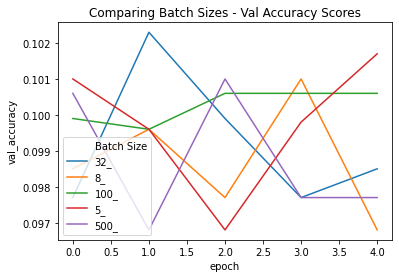

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)
ax.set_title("Comparing Batch Sizes - Val Accuracy Scores")
plt.show();

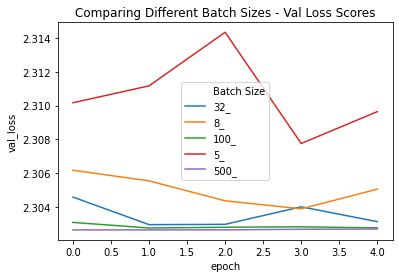

In [ ]:
ax = sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);
ax.set_title("Comparing Different Batch Sizes - Val Loss Scores")
plt.show();

#WRITE YOUR ANAYLSIS HERE

#Find a best batch and use for the below section.

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [ ]:
quickdraw_model_100 = create_model(1,SGD)

bt_model100 = quickdraw_model_100.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=5,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/5
2500/2500 [==============================] - 5s 2ms/step - loss: 14505827.0000 - accuracy: 0.1009 - val_loss: 2.3104 - val_accuracy: 0.1006
Epoch 2/5
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3226 - accuracy: 0.1006 - val_loss: 2.3087 - val_accuracy: 0.1010
Epoch 3/5
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3097 - accuracy: 0.1007 - val_loss: 2.3119 - val_accuracy: 0.1023
Epoch 4/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3104 - accuracy: 0.0971 - val_loss: 2.3081 - val_accuracy: 0.1010
Epoch 5/5
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3098 - accuracy: 0.1002 - val_loss: 2.3112 - val_accuracy: 0.1023


In [ ]:
quickdraw_model_10 = create_model(.1, SGD)

bt_model10 = quickdraw_model_10.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=5,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/5
2500/2500 [==============================] - 5s 2ms/step - loss: 1191695613952.0000 - accuracy: 0.0994 - val_loss: 2.3030 - val_accuracy: 0.0968
Epoch 2/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3032 - accuracy: 0.1005 - val_loss: 2.3031 - val_accuracy: 0.1019
Epoch 3/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.0988 - val_loss: 2.3030 - val_accuracy: 0.1019
Epoch 4/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.1012 - val_loss: 2.3033 - val_accuracy: 0.0968
Epoch 5/5
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3033 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.1019


In [ ]:
quickdraw_model_01 = create_model(.01, SGD)

bt_model01 = quickdraw_model_01.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=5,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/5
2500/2500 [==============================] - 5s 2ms/step - loss: 7.2682 - accuracy: 0.1005 - val_loss: 2.2951 - val_accuracy: 0.1021
Epoch 2/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.2597 - accuracy: 0.1227 - val_loss: 2.3030 - val_accuracy: 0.0977
Epoch 3/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1010
Epoch 4/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0968
Epoch 5/5
2500/2500 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.0978 - val_loss: 2.3028 - val_accuracy: 0.0968


In [ ]:
quickdraw_model_001 = create_model(.001, SGD)

bt_model001 = quickdraw_model_001.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=30,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0432 - accuracy: 0.3385 - val_loss: 1.7069 - val_accuracy: 0.3845
Epoch 2/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.6162 - accuracy: 0.4081 - val_loss: 1.5569 - val_accuracy: 0.4301
Epoch 3/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.4862 - accuracy: 0.4556 - val_loss: 1.4413 - val_accuracy: 0.4785
Epoch 4/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3920 - accuracy: 0.4861 - val_loss: 1.3799 - val_accuracy: 0.5207
Epoch 5/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3230 - accuracy: 0.5093 - val_loss: 1.3338 - val_accuracy: 0.5150
Epoch 6/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.2688 - accuracy: 0.5214 - val_loss: 1.2672 - val_accuracy: 0.5371
Epoch 7/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.2130 - accuracy: 0.5520 - val_loss: 1.2202 - val_accuracy:

In [ ]:
quickdraw_model_0001 = create_model(.0001, SGD)

bt_model0001 = quickdraw_model_0001.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=30,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 4s 2ms/step - loss: 3.9537 - accuracy: 0.2405 - val_loss: 1.9693 - val_accuracy: 0.3006
Epoch 2/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.8670 - accuracy: 0.3575 - val_loss: 1.8013 - val_accuracy: 0.3811
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.7336 - accuracy: 0.3959 - val_loss: 1.7177 - val_accuracy: 0.4050
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6572 - accuracy: 0.4192 - val_loss: 1.6561 - val_accuracy: 0.4300
Epoch 5/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.6004 - accuracy: 0.4379 - val_loss: 1.6082 - val_accuracy: 0.4431
Epoch 6/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.5549 - accuracy: 0.4512 - val_loss: 1.5657 - val_accuracy: 0.4443
Epoch 7/30
2500/2500 [==============================] - 4s 2ms/step - loss: 1.5229 - accuracy: 0.4582 - val_loss: 1.5403 - val_accuracy:

In [ ]:
# Similar to bt_model4, added more epochs to analyze val acc score
quickdraw_model_00001 = create_model(.001, SGD)

bt_model00001 = quickdraw_model_00001.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=35,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/35
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0807 - accuracy: 0.3054 - val_loss: 1.7366 - val_accuracy: 0.3649
Epoch 2/35
2500/2500 [==============================] - 4s 2ms/step - loss: 1.6484 - accuracy: 0.3984 - val_loss: 1.5931 - val_accuracy: 0.4259
Epoch 3/35
2500/2500 [==============================] - 4s 2ms/step - loss: 1.4995 - accuracy: 0.4492 - val_loss: 1.4599 - val_accuracy: 0.4760
Epoch 4/35
2500/2500 [==============================] - 4s 2ms/step - loss: 1.4135 - accuracy: 0.4613 - val_loss: 1.3896 - val_accuracy: 0.4680
Epoch 5/35
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3381 - accuracy: 0.4811 - val_loss: 1.3226 - val_accuracy: 0.5296
Epoch 6/35
2500/2500 [==============================] - 4s 2ms/step - loss: 1.2262 - accuracy: 0.5577 - val_loss: 1.1947 - val_accuracy: 0.5869
Epoch 7/35
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1592 - accuracy: 0.5913 - val_loss: 1.1609 - val_accuracy:

#Graph the Different Learning Rates

In [ ]:
import pandas as pd

learning_rates = []

for exp, result in zip([
                        bt_model100, 
                        bt_model10, 
                        bt_model01, 
                        bt_model001, 
                        bt_model0001,
                        bt_model00001
                        ], 
                       [
                        "1.0_", 
                        ".1_", 
                        ".01_", 
                        ".001_", 
                        ".0001_",
                        ".00001_"
                        ]
):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.636091e+12,0.099987,2.304595,0.0977,0,32_
1,2.303276e+00,0.099887,2.302965,0.1023,1,32_
2,2.303268e+00,0.101713,2.302982,0.0999,2,32_
3,2.303356e+00,0.099300,2.304019,0.0977,3,32_
4,2.303346e+00,0.100700,2.303142,0.0985,4,32_


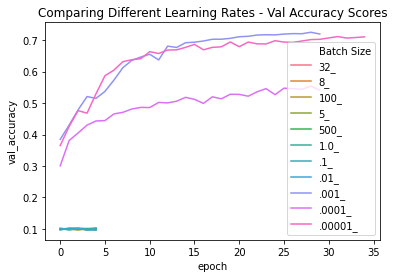

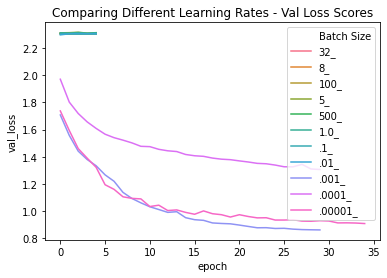

In [ ]:
# import seaborn as sns
ax = sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)  # Remove hue='Batch Size'
ax.set_title("Comparing Different Learning Rates - Val Accuracy Scores")
plt.show();

ax = sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df) # Remove hue='Batch Size' 
ax.set_title("Comparing Different Learning Rates - Val Loss Scores")
plt.show();

#WRITE YOUR ANALYSIS HERE

#Find the best learning rate and use for the following section


### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [ ]:
from tensorflow.keras.optimizers import SGD
quickdraw_model_SGD = create_model(.001, SGD)

bt_modelSGD = quickdraw_model_SGD.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=27,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/27
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1020 - accuracy: 0.3194 - val_loss: 1.7058 - val_accuracy: 0.3853
Epoch 2/27
2500/2500 [==============================] - 4s 2ms/step - loss: 1.6434 - accuracy: 0.4201 - val_loss: 1.5818 - val_accuracy: 0.4406
Epoch 3/27
2500/2500 [==============================] - 4s 2ms/step - loss: 1.5435 - accuracy: 0.4569 - val_loss: 1.5083 - val_accuracy: 0.4711
Epoch 4/27
2500/2500 [==============================] - 4s 2ms/step - loss: 1.4458 - accuracy: 0.4989 - val_loss: 1.3968 - val_accuracy: 0.4968
Epoch 5/27
2500/2500 [==============================] - 4s 2ms/step - loss: 1.3519 - accuracy: 0.5365 - val_loss: 1.3181 - val_accuracy: 0.5647
Epoch 6/27
2500/2500 [==============================] - 4s 2ms/step - loss: 1.2600 - accuracy: 0.5761 - val_loss: 1.2420 - val_accuracy: 0.5949
Epoch 7/27
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1963 - accuracy: 0.6041 - val_loss: 1.1853 - val_accuracy:

In [ ]:
from tensorflow.keras.optimizers import Adadelta
quickdraw_model_Adadelta = create_model(.001, Adadelta)

bt_modelAdadelta = quickdraw_model_Adadelta.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=27,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/27
2500/2500 [==============================] - 5s 2ms/step - loss: 94.2628 - accuracy: 0.0998 - val_loss: 62.7314 - val_accuracy: 0.1173
Epoch 2/27
2500/2500 [==============================] - 5s 2ms/step - loss: 50.5870 - accuracy: 0.1235 - val_loss: 40.8647 - val_accuracy: 0.1462
Epoch 3/27
2500/2500 [==============================] - 5s 2ms/step - loss: 35.7419 - accuracy: 0.1462 - val_loss: 30.4789 - val_accuracy: 0.1596
Epoch 4/27
2500/2500 [==============================] - 5s 2ms/step - loss: 27.0945 - accuracy: 0.1606 - val_loss: 23.2940 - val_accuracy: 0.1707
Epoch 5/27
2500/2500 [==============================] - 5s 2ms/step - loss: 20.8072 - accuracy: 0.1691 - val_loss: 18.0310 - val_accuracy: 0.1773
Epoch 6/27
2500/2500 [==============================] - 5s 2ms/step - loss: 16.1220 - accuracy: 0.1734 - val_loss: 14.1423 - val_accuracy: 0.1783
Epoch 7/27
2500/2500 [==============================] - 5s 2ms/step - loss: 12.7156 - accuracy: 0.1769 - val_loss: 11.3229 -

In [ ]:
from tensorflow.keras.optimizers import Adagrad
quickdraw_model_Adagrad = create_model(.001, Adagrad)

bt_modelAdagrad = quickdraw_model_Adagrad.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=27,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/27
2500/2500 [==============================] - 5s 2ms/step - loss: 5.7730 - accuracy: 0.2564 - val_loss: 2.5131 - val_accuracy: 0.2598
Epoch 2/27
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3343 - accuracy: 0.2628 - val_loss: 2.2063 - val_accuracy: 0.2574
Epoch 3/27
2500/2500 [==============================] - 4s 2ms/step - loss: 2.1452 - accuracy: 0.2742 - val_loss: 2.0903 - val_accuracy: 0.2877
Epoch 4/27
2500/2500 [==============================] - 4s 2ms/step - loss: 2.0486 - accuracy: 0.2996 - val_loss: 2.0125 - val_accuracy: 0.3073
Epoch 5/27
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9796 - accuracy: 0.3202 - val_loss: 1.9532 - val_accuracy: 0.3236
Epoch 6/27
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9260 - accuracy: 0.3349 - val_loss: 1.9062 - val_accuracy: 0.3379
Epoch 7/27
2500/2500 [==============================] - 5s 2ms/step - loss: 1.8832 - accuracy: 0.3470 - val_loss: 1.8697 - val_accuracy:

In [ ]:
from tensorflow.keras.optimizers import Adam
quickdraw_model_Adam = create_model(.001, Adam)

bt_modelAdam = quickdraw_model_Adam.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=27,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/27
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0208 - accuracy: 0.4351 - val_loss: 1.3335 - val_accuracy: 0.5524
Epoch 2/27
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2311 - accuracy: 0.5889 - val_loss: 1.1791 - val_accuracy: 0.5976
Epoch 3/27
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1294 - accuracy: 0.6301 - val_loss: 1.0836 - val_accuracy: 0.6533
Epoch 4/27
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0584 - accuracy: 0.6619 - val_loss: 1.0783 - val_accuracy: 0.6717
Epoch 5/27
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0115 - accuracy: 0.6757 - val_loss: 0.9922 - val_accuracy: 0.6864
Epoch 6/27
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9676 - accuracy: 0.6872 - val_loss: 0.9297 - val_accuracy: 0.7014
Epoch 7/27
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9105 - accuracy: 0.7054 - val_loss: 0.8834 - val_accuracy:

In [ ]:
# !pip install FtrlOptimizer  # What is the dependency for this optimizer??

ERROR: Could not find a version that satisfies the requirement FtrlOptimizer (from versions: none)
ERROR: No matching distribution found for FtrlOptimizer


In [ ]:
# from tensorflow.keras.optimizers import FTRL
# quickdraw_model_FTRL = create_model(.001, FTRL)

# bt_modelFTRL = quickdraw_model_FTRL.fit(X_train, y_train,
#                                 # Hyperparameters!
#                                 epochs=27,
#                                 batch_size=32,
#                                 validation_data=(X_test, y_test))

ImportError: ignored

In [ ]:
# !pip install NAdam  # What is the dependency for this optimizer??

ERROR: Could not find a version that satisfies the requirement NAdam (from versions: none)
ERROR: No matching distribution found for NAdam


In [ ]:
# from tensorflow.keras.optimizers import NAdam
# # Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.
# quickdraw_model_NAdam = create_model(.001, NAdam)

# bt_modelNAdam = quickdraw_model_NAdam.fit(X_train, y_train,
#                                 # Hyperparameters!
#                                 epochs=27,
#                                 batch_size=32,
#                                 validation_data=(X_test, y_test))

ImportError: ignored

In [ ]:
from tensorflow.keras.optimizers import RMSprop
quickdraw_model_RMSprop = create_model(.001,  RMSprop)

bt_modelRMSprop = quickdraw_model_RMSprop.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=22,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/22
2500/2500 [==============================] - 5s 2ms/step - loss: 1.7010 - accuracy: 0.5659 - val_loss: 1.1913 - val_accuracy: 0.6857
Epoch 2/22
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0925 - accuracy: 0.6989 - val_loss: 1.0582 - val_accuracy: 0.6664
Epoch 3/22
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0133 - accuracy: 0.7260 - val_loss: 1.0175 - val_accuracy: 0.7356
Epoch 4/22
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9500 - accuracy: 0.7415 - val_loss: 0.9377 - val_accuracy: 0.7526
Epoch 5/22
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9051 - accuracy: 0.7567 - val_loss: 0.9190 - val_accuracy: 0.7492
Epoch 6/22
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8540 - accuracy: 0.7709 - val_loss: 0.8797 - val_accuracy: 0.7791
Epoch 7/22
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8193 - accuracy: 0.7806 - val_loss: 0.8547 - val_accuracy:

#Graph the Different Optimizations

In [ ]:
import pandas as pd

batch_sizes = []

for exp, result in zip([
                        bt_modelSGD, 
                        bt_modelAdadelta, 
                        bt_modelAdagrad, 
                        bt_modelAdam, 
                        # bt_modelFTRL,
                        # bt_modelNAdam,
                        bt_modelRMSprop,
                        ], 
                       [
                        "SGD_", 
                        "Adadelta_", 
                        "Adagrad_", 
                        "Adam_", 
                        # "FTRL_",
                        # "NAdam_",
                        "RMSprop_"
                        ]
):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,2.102048,0.319438,1.705822,0.3853,0,SGD_
1,1.643383,0.420063,1.581813,0.4406,1,SGD_
2,1.543473,0.456888,1.508285,0.4711,2,SGD_
3,1.445844,0.498888,1.396767,0.4968,3,SGD_
4,1.351927,0.536550,1.318135,0.5647,4,SGD_


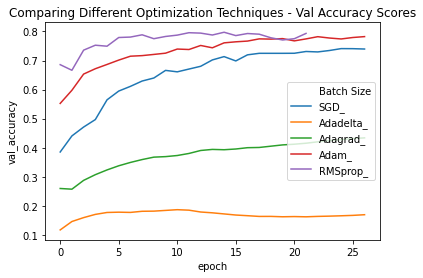

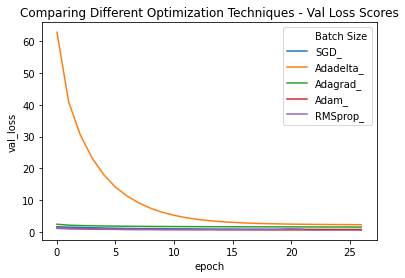

In [ ]:
# import seaborn as sns
ax = sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)
ax.set_title("Comparing Different Optimization Techniques - Val Accuracy Scores")
plt.show();

ax = sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);
ax.set_title("Comparing Different Optimization Techniques - Val Loss Scores")
plt.show();

#WRITE YOU ANAYLSIS HERE

#Find the best optimizer and post your anaylsis of all three sections.

#Take your best model and improve on it for one final winner

RMSprop Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop
quickdraw_model_RMSprop = create_model(.001,  RMSprop)

bt_model1 = quickdraw_model_RMSprop.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=22,
                                batch_size=5,
                                validation_data=(X_test, y_test))

Epoch 1/22
16000/16000 [==============================] - 33s 2ms/step - loss: 1.8928 - accuracy: 0.5035 - val_loss: 1.6396 - val_accuracy: 0.5663
Epoch 2/22
16000/16000 [==============================] - 33s 2ms/step - loss: 1.6220 - accuracy: 0.5893 - val_loss: 1.7098 - val_accuracy: 0.6047
Epoch 3/22
16000/16000 [==============================] - 33s 2ms/step - loss: 1.6378 - accuracy: 0.5968 - val_loss: 1.7717 - val_accuracy: 0.5849
Epoch 4/22
16000/16000 [==============================] - 33s 2ms/step - loss: 1.6394 - accuracy: 0.6078 - val_loss: 1.6630 - val_accuracy: 0.6353
Epoch 5/22
16000/16000 [==============================] - 35s 2ms/step - loss: 1.6586 - accuracy: 0.6258 - val_loss: 1.5639 - val_accuracy: 0.5608
Epoch 6/22
16000/16000 [==============================] - 33s 2ms/step - loss: 1.8834 - accuracy: 0.5109 - val_loss: 1.8998 - val_accuracy: 0.3861
Epoch 7/22
16000/16000 [==============================] - 33s 2ms/step - loss: 2.1753 - accuracy: 0.4003 - val_loss: 2

In [ ]:
from tensorflow.keras.optimizers import RMSprop
quickdraw_model_RMSprop = create_model(.001,  RMSprop)

bt_model2 = quickdraw_model_RMSprop.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=15,
                                batch_size=33,
                                validation_data=(X_test, y_test))

Epoch 1/15
2425/2425 [==============================] - 6s 2ms/step - loss: 1.9448 - accuracy: 0.6076 - val_loss: 1.0980 - val_accuracy: 0.6783
Epoch 2/15
2425/2425 [==============================] - 6s 2ms/step - loss: 0.9770 - accuracy: 0.7327 - val_loss: 0.9426 - val_accuracy: 0.7327
Epoch 3/15
2425/2425 [==============================] - 6s 2ms/step - loss: 0.8885 - accuracy: 0.7574 - val_loss: 0.9089 - val_accuracy: 0.7428
Epoch 4/15
2425/2425 [==============================] - 6s 2ms/step - loss: 0.8434 - accuracy: 0.7704 - val_loss: 0.9015 - val_accuracy: 0.7728
Epoch 5/15
2425/2425 [==============================] - 7s 3ms/step - loss: 0.8265 - accuracy: 0.7758 - val_loss: 0.8419 - val_accuracy: 0.7737
Epoch 6/15
2425/2425 [==============================] - 6s 3ms/step - loss: 0.7991 - accuracy: 0.7842 - val_loss: 0.8060 - val_accuracy: 0.7838
Epoch 7/15
2425/2425 [==============================] - 6s 2ms/step - loss: 0.7675 - accuracy: 0.7888 - val_loss: 0.8411 - val_accuracy:

In [ ]:
from tensorflow.keras.optimizers import RMSprop
quickdraw_model_RMSprop = create_model(.001,  RMSprop)

bt_model3 = quickdraw_model_RMSprop.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=13,
                                batch_size=40,
                                validation_data=(X_test, y_test))

Epoch 1/13
2000/2000 [==============================] - 4s 2ms/step - loss: 1.9434 - accuracy: 0.5256 - val_loss: 1.2186 - val_accuracy: 0.6299
Epoch 2/13
2000/2000 [==============================] - 4s 2ms/step - loss: 1.1565 - accuracy: 0.6696 - val_loss: 1.1348 - val_accuracy: 0.6993
Epoch 3/13
2000/2000 [==============================] - 4s 2ms/step - loss: 1.0514 - accuracy: 0.7088 - val_loss: 1.0679 - val_accuracy: 0.7179
Epoch 4/13
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9867 - accuracy: 0.7281 - val_loss: 0.9888 - val_accuracy: 0.7306
Epoch 5/13
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9409 - accuracy: 0.7404 - val_loss: 0.9432 - val_accuracy: 0.7549
Epoch 6/13
2000/2000 [==============================] - 4s 2ms/step - loss: 0.9038 - accuracy: 0.7498 - val_loss: 0.9330 - val_accuracy: 0.7485
Epoch 7/13
2000/2000 [==============================] - 4s 2ms/step - loss: 0.8711 - accuracy: 0.7603 - val_loss: 0.9081 - val_accuracy:

In [ ]:
from tensorflow.keras.optimizers import RMSprop
quickdraw_model_RMSprop = create_model(.001,  RMSprop)

bt_model4 = quickdraw_model_RMSprop.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=19,
                                batch_size=100,
                                validation_data=(X_test, y_test))

Epoch 1/19
800/800 [==============================] - 2s 2ms/step - loss: 2.2923 - accuracy: 0.4268 - val_loss: 1.2995 - val_accuracy: 0.5450
Epoch 2/19
800/800 [==============================] - 2s 2ms/step - loss: 1.1621 - accuracy: 0.6151 - val_loss: 1.0985 - val_accuracy: 0.6556
Epoch 3/19
800/800 [==============================] - 2s 2ms/step - loss: 1.0325 - accuracy: 0.6633 - val_loss: 1.0119 - val_accuracy: 0.6801
Epoch 4/19
800/800 [==============================] - 2s 2ms/step - loss: 0.9785 - accuracy: 0.6870 - val_loss: 0.9632 - val_accuracy: 0.7064
Epoch 5/19
800/800 [==============================] - 2s 2ms/step - loss: 0.9372 - accuracy: 0.7022 - val_loss: 0.9308 - val_accuracy: 0.6968
Epoch 6/19
800/800 [==============================] - 2s 2ms/step - loss: 0.9064 - accuracy: 0.7138 - val_loss: 0.9101 - val_accuracy: 0.7080
Epoch 7/19
800/800 [==============================] - 2s 2ms/step - loss: 0.8878 - accuracy: 0.7216 - val_loss: 0.8949 - val_accuracy: 0.7215
Epoch 

#Graph the final results

In [ ]:
learning_rates = []

for exp, result in zip([
                        bt_model1, 
                        bt_model2, 
                        bt_model3, 
                        bt_model4
                        ], 
                       [
                        "model1_", 
                        "model2_", 
                        "model3_", 
                        "model4_"
                        ]
):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,2.102048,0.319438,1.705822,0.3853,0,SGD_
1,1.643383,0.420063,1.581813,0.4406,1,SGD_
2,1.543473,0.456888,1.508285,0.4711,2,SGD_
3,1.445844,0.498888,1.396767,0.4968,3,SGD_
4,1.351927,0.536550,1.318135,0.5647,4,SGD_


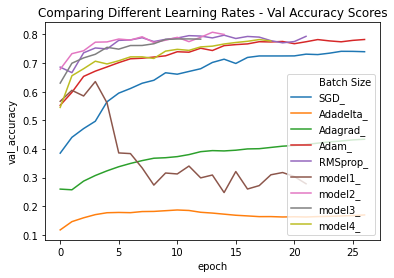

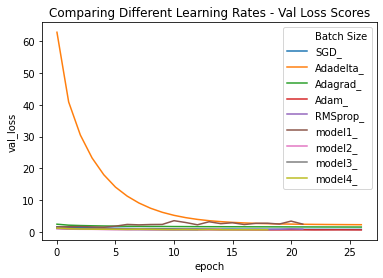

In [ ]:
# import seaborn as sns
ax = sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df)  # Remove hue='Batch Size'
ax.set_title("Comparing Different Learning Rates - Val Accuracy Scores")
plt.show();

ax = sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df) # Remove hue='Batch Size' 
ax.set_title("Comparing Different Learning Rates - Val Loss Scores")
plt.show();

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Backpropagation, short for "backward propagation of errors," is an algorithm for supervised learning of artificial neural networks using gradient descent. Given an artificial neural network and an error function, the method calculates the gradient of the error function with respect to the neural network's weights.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


